In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load the tokenizer and model
# model_name = "princeton-nlp/Llama-3-Base-8B-SFT"  # Replace with the correct model path if needed
# model_name = "/mnt/data1/jinlong/DPO-noisy-outputs/llama-3-1b-sft"
model_name = "/mnt/data1/jinlong/DPO-noisy-outputs/mistral-7b-dpo-new1/"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Test the model by generating text
input_text = "Hello, LLaMA!"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model.generate(**inputs)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


/home/jlpang/SimPO/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 3/3 [00:07<00:00,  2.47s/it]
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Hello, LLaMA!

I am writing to express my deep admiration for your exceptional work in the field of natural


In [5]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel


# base_model = "llama-3-1b"
base_model="mistral-7b"
loss_type="ours1-1"

#### base_model_path = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-sft"

base_model_path="alignment-handbook/zephyr-7b-sft-full"
lora_model_path = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}"
output_dir = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}-merged"

# 加载基础模型
base_model = AutoModelForCausalLM.from_pretrained(base_model_path)
tokenizer = AutoTokenizer.from_pretrained(base_model_path)

model_to_merge = PeftModel.from_pretrained(base_model, lora_model_path)
merged_model = model_to_merge.merge_and_unload()
merged_model.save_pretrained(output_dir)
merged_model.config.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

# ### finished store
model_name = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}-merged"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Test the model by generating text
input_text = "Hello, Mistral!"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model.generate(**inputs)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)



Loading checkpoint shards: 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]


OSError: Incorrect path_or_model_id: '/mnt/data1/jinlong/DPO-noisy-outputs/MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      )
    )
    (norm): MistralRMSNorm((4096,), eps=1e-05)
  )
  (lm_head): Linear(in_features=4096, out_features=32000, bias=False)
)-ours1-1-merged'. Please provide either the path to a local folder or the repo_id of a model on the Hub.

: 

In [2]:
import numpy as np
from scipy.stats import norm

# 假设 A 和 B 的均值和标准差
mu_A = 5  # A 的均值
sigma_A = 2  # A 的标准差
mu_B = 3  # B 的均值
sigma_B = 1.5  # B 的标准差

# 给定的实际值
a = 6  # 这里假设 a 来自 A 分布
b = 4  # 这里假设 b 来自 B 分布

# 计算 D = a - b
D = a - b

# 计算差异的均值和标准差
mu_diff = mu_A - mu_B
sigma_diff = np.sqrt(sigma_A**2 + sigma_B**2)

# 计算 P(D > 0) 的可信度
probability_A_greater_B = norm.cdf(D, loc=mu_diff, scale=sigma_diff)

print(f"a > b 的可信度 (P(a > b)): {probability_A_greater_B:.4f}")



a > b 的可信度 (P(a > b)): 0.5000


In [1]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel


# base_model = "llama-3-1b"
base_model="llama-3-8b"
loss_type="dpo-new"

####################################################################################
#### base_model_path = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-sft"

# base_model_path="princeton-nlp/Llama-3-Base-8B-SFT"
# lora_model_path = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}"
# output_dir = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}-merged"

# # 加载基础模型
# base_model = AutoModelForCausalLM.from_pretrained(base_model_path)
# tokenizer = AutoTokenizer.from_pretrained(base_model_path)

# model_to_merge = PeftModel.from_pretrained(base_model, lora_model_path)
# merged_model = model_to_merge.merge_and_unload()
# merged_model.save_pretrained(output_dir)
# merged_model.config.save_pretrained(output_dir)
# tokenizer.save_pretrained(output_dir)
####################################################################################


# ### finished store
model_name = f"/mnt/data1/jinlong/DPO-noisy-outputs/{base_model}-{loss_type}-merged"
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Test the model by generating text
input_text = "Hello, Mistral!"
inputs = tokenizer(input_text, return_tensors="pt")
outputs = model.generate(**inputs)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)



/home/jlpang/SimPO/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading checkpoint shards: 100%|██████████| 7/7 [00:01<00:00,  4.91it/s]
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Hello, Mistral! I'm glad you enjoyed the poem. I hope you find some inspiration in it to write your own


In [6]:
input = [{"role": "system", "content": "You are a helpful assistant."},{"role": "user", "content": "Hello, how are you?"}]

tokenizer.apply_chat_template(input, tokenize=False)

'<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant.<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nHello, how are you?<|eot_id|>'

In [9]:
prompt_all = ["How did US states get their names?", "What are the names of some famous actors that started their careers on Broadway?"]

temp = []
for prompt in prompt_all:

    prompt_chat = [{"role": "system", "content": "You are a helpful assistant"},
                    {"role": "user", "content": prompt}]
    prompt_chat = tokenizer.apply_chat_template(prompt_chat, tokenize=False)
    temp.append(prompt_chat)

In [10]:
temp

['<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nHow did US states get their names?<|eot_id|>',
 '<|begin_of_text|><|start_header_id|>system<|end_header_id|>\n\nYou are a helpful assistant<|eot_id|><|start_header_id|>user<|end_header_id|>\n\nWhat are the names of some famous actors that started their careers on Broadway?<|eot_id|>']

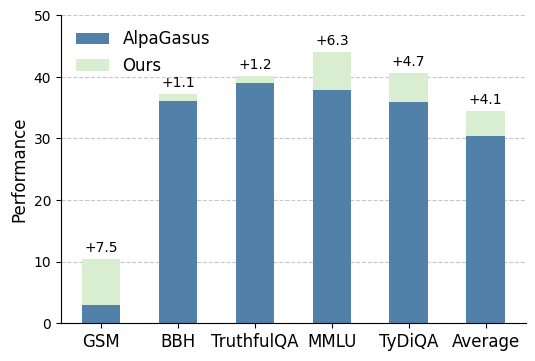

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
categories = ["GSM", "BBH", "TruthfulQA", "MMLU", "TyDiQA", "Average"]
alpagasus_scores = np.array([3.0, 36.1, 39.0, 37.8, 35.9, 30.4])
ours_scores = np.array([10.5, 37.2, 40.2, 44.1, 40.6, 34.5])
diff_perc_scores = (ours_scores - alpagasus_scores) / alpagasus_scores * 100  # 计算提升的差值
diff_scores = ours_scores - alpagasus_scores  # 计算提升的差值

x = np.arange(len(categories))  # 横坐标索引
width = 0.5  # 柱子宽度增加，使其类似拼接的效果

fig, ax = plt.subplots(figsize=(6, 4))  # 调整整个图的比例缩小
colors = ['#5180a9', '#d9edd1']  # 调整配色

# 绘制堆叠柱状图
rects1 = ax.bar(x, alpagasus_scores, width, label='AlpaGasus', color=colors[0])
rects2 = ax.bar(x, diff_scores, width, label='Ours', color=colors[1], bottom=alpagasus_scores)

# 添加标签和标题
ax.set_ylabel('Performance', fontsize=12)
# ax.set_title('Apples-to-apples comparison', fontsize=18, pad=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
legend = ax.legend(fontsize=12)
legend.get_frame().set_linewidth(0)
legend.set_zorder(0)

# 只保留横线的网格，且设置在最底层
ax.yaxis.grid(True, linestyle='--', alpha=0.7, zorder=0)
ax.xaxis.grid(False)

# 仅保留 x 和 y 轴的边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 50)
ax.tick_params(axis='y', labelsize=10)

# 确保柱状图在网格线之上
for rect in rects1 + rects2:
    rect.set_zorder(2)

# 添加数值标签（标注提升部分）
for rect1, rect2, diff in zip(rects1, rects2, diff_scores):
    height = rect1.get_height() + rect2.get_height()

    ax.annotate(f'+{diff:.1f}',
                xy=(rect1.get_x() + rect1.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10)

plt.show()
# apple_to_apple_comparison

Generating test split: 100%|██████████| 750/750 [00:00<00:00, 29068.97 examples/s]


In [3]:
dataset[0]

{'dataset': 'argilla/distilabel-intel-orca-dpo-pairs',
 'chosen': [{'content': 'Q:Question: how old julio cesar chavez when he fought de la hoya I found the following answer on Google: He holds records for most successful consecutive defenses of world titles (27), most title fights (37), most title-fight victories (31) and he is after Joe Louis with (23) for most title defenses won by knockout (21). Is that a correct answer? Yes or no.\nA:',
   'role': 'user'},
  {'content': " Yes, the information you found on Google is correct. Julio César Chávez holds several records related to world title defenses and victories, and he is considered one of the greatest boxers in history. Here is a detailed answer to your question:\n\nJulio César Chávez was born on July 12, 1962, in Ciudad Obregón, Sonora, Mexico. He began boxing at a young age and quickly made a name for himself in the sport, winning his first world title in 1984 when he defeated Mario Miranda for the WBC super featherweight champio

In [5]:
from datasets import load_dataset


dataset = load_dataset("argilla/distilabel-intel-orca-dpo-pairs")['train']


In [6]:
dataset

Dataset({
    features: ['system', 'input', 'chosen', 'rejected', 'generations', 'order', 'labelling_model', 'labelling_prompt', 'raw_labelling_response', 'rating', 'rationale', 'status', 'original_chosen', 'original_rejected', 'chosen_score', 'in_gsm8k_train'],
    num_rows: 12859
})

In [8]:
from datasets import load_dataset, load_from_disk


dataset_path = "datasets/ultrafeedback-random-identical-subset"

raw_dataset = load_from_disk(dataset_path)




In [9]:
raw_dataset['train_prefs'][0]

{'source': 'sharegpt',
 'prompt': 'Provide step-by-step instructions for how to implement a copy of Piston Honda using TypeScript.',
 'chosen': [{'content': 'Provide step-by-step instructions for how to implement a copy of Piston Honda using TypeScript.',
   'role': 'user'},
  {'content': "Creating a replica of Piston Honda (a JavaScript drawable engine) using TypeScript involves several steps. TypeScript is a strict superset of JavaScript, and it adds optional types among other features. This example will illustrate how to create a simple TypeScript drawable engine, but note that it won't include all of the features of Piston Honda.\n\n1. **Setting up the project:**\n\nFirst, you need to setup the environment for TypeScript. You can create a new directory for your project and initialize a new npm project.\n\n```bash\nmkdir piston-honda-ts\ncd piston-honda-ts\nnpm init -y\n```\n\n2. **Installing TypeScript:**\n\nInstall TypeScript globally in your system.\n\n```bash\nnpm install -g typ

In [11]:
raw_dataset['train_prefs'][0]

{'source': 'sharegpt',
 'prompt': 'Provide step-by-step instructions for how to implement a copy of Piston Honda using TypeScript.',
 'rejected': [{'content': 'Provide step-by-step instructions for how to implement a copy of Piston Honda using TypeScript.',
   'role': 'user'},
  {'content': "Creating a replica of Piston Honda (a JavaScript drawable engine) using TypeScript involves several steps. TypeScript is a strict superset of JavaScript, and it adds optional types among other features. This example will illustrate how to create a simple TypeScript drawable engine, but note that it won't include all of the features of Piston Honda.\n\n1. **Setting up the project:**\n\nFirst, you need to setup the environment for TypeScript. You can create a new directory for your project and initialize a new npm project.\n\n```bash\nmkdir piston-honda-ts\ncd piston-honda-ts\nnpm init -y\n```\n\n2. **Installing TypeScript:**\n\nInstall TypeScript globally in your system.\n\n```bash\nnpm install -g t

In [12]:

raw_dataset['train_prefs'] = raw_dataset['train_prefs'].rename_column('chosen', 'temp')
raw_dataset['train_prefs'] = raw_dataset['train_prefs'].rename_column('rejected', 'chosen')
raw_dataset['train_prefs'] = raw_dataset['train_prefs'].rename_column('temp', 'rejected')


store_path = "datasets/ultrafeedback-random-identical-reverse-subset"


raw_dataset.save_to_disk(store_path)


Saving the dataset (1/1 shards): 100%|██████████| 2000/2000 [00:00<00:00, 101228.56 examples/s]


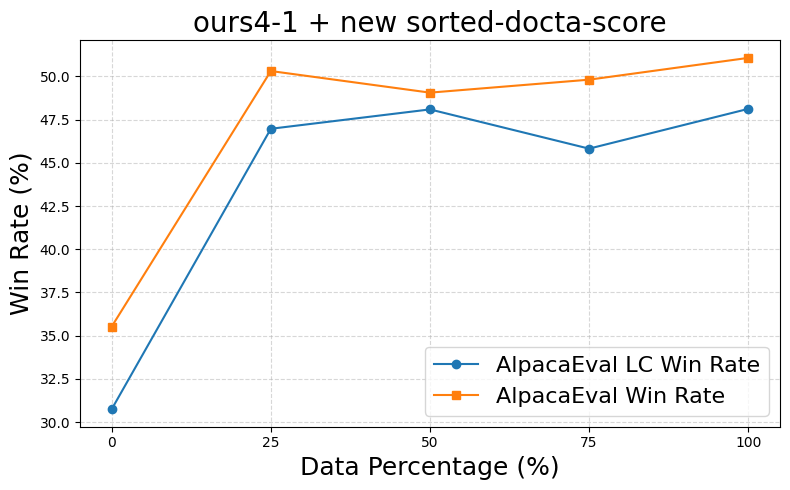

In [8]:
import matplotlib.pyplot as plt

# 数据
lc_win_rate = [30.75, 46.97, 48.09, 45.82, 48.12]
overall_win_rate = [35.53, 50.31, 49.06, 49.81, 51.07]
x = list(range(0, len(lc_win_rate) * 25, 25))  # x 轴：第几个实验点（可换成更有意义的标签）

# 画图
plt.figure(figsize=(8, 5))
plt.plot(x, lc_win_rate, marker='o', label='AlpacaEval LC Win Rate')
plt.plot(x, overall_win_rate, marker='s', label='AlpacaEval Win Rate')

# 美化
plt.title('ours4-1 + new sorted-docta-score', fontsize=20)
plt.xlabel('Data Percentage (%)',fontsize=18)
plt.ylabel('Win Rate (%)',fontsize=18)
plt.xticks(x)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=16)
plt.tight_layout()

# 展示
plt.show()
